In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut

In [2]:
def model(xdata, coef, bias):
    y = np.ones(len(xdata))*bias
    for i in range(len(coef)):
        y += coef[i] * xdata[:,i]
    return y

In [3]:
data = pd.read_csv('Cars93.csv')
X = np.array(data[['MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers','Length','Wheelbase','Width','Turn.circle','Weight']], dtype=float)
Y = np.array(data['Price'], dtype=float)

In [4]:
clf = linear_model.Lasso(alpha=0.1, normalize=True)

In [33]:
N = 10
MSE = np.zeros(N)
alpha_list = np.zeros(N)
coef_list = np.zeros((N,len(X[0])))
for j in range(N):
    a = 0.03*(j+1)
    clf = linear_model.Lasso(alpha=a, normalize=True)
    loo = LeaveOneOut()
    R2 = []
    for train_index, test_index in loo.split(X):
    #   print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        R = np.sum((Y_train - model(X_train, clf.coef_, clf.intercept_))**2)
        R = R/len(X_train)
        R2.append(R)
        coef_list[j] += clf.coef_/len(X_train)
    MSE[j] = np.mean(R2)
    alpha_list[j] = a

Text(0, 0.5, 'MSE')

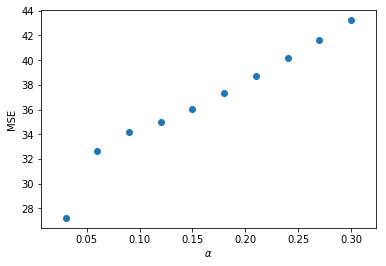

In [34]:
plt.scatter(alpha_list, MSE)
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')

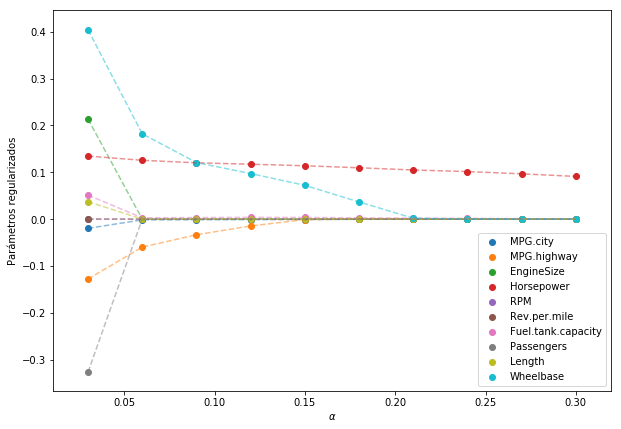

In [45]:
legends = ['MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers','Length','Wheelbase','Width','Turn.circle','Weight']
plt.figure(figsize=(10,7))
for i in range(len(coef_list)):
    plt.scatter(alpha_list, coef_list[:,i], label=legends[i])
    plt.plot(alpha_list, coef_list[:,i],"--",alpha=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Parámetros regularizados')
plt.legend(loc='lower right')
plt.show()

Según la gráfica las variables que aportan más al modelo son 'Horsepower' , 'Wheelbase' y 'MPG.highway', aunque al final la 